![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

# Pandas 

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [1]:
%reset -f
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [2]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# freq="D" means a daily interval
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

### Exercise 1
- import collections and lorem
- Create a text with `lorem` and count word occurences with a `collections.Counter`. Put the result in a `dict`.

In [34]:
import collections
import lorem

text = lorem.text()
text = list(filter(None,text.replace(".", " ").replace("\n"," ").split(" ")))
dict_text = dict(collections.Counter(text))

### Exercise 2
- From the results create a Pandas series name latin_series with words in alphabetical order as index.

In [43]:
text_serie = pd.Series(dict_text, index=sorted(dict_text.keys()))
text_serie

Adipisci        1
Aliquam         2
Amet            3
Consectetur     1
               ..
tempora        11
ut              6
velit           5
voluptatem      7
Length: 46, dtype: int64

### Exercise 3

- Plot the series using 'bar' kind.

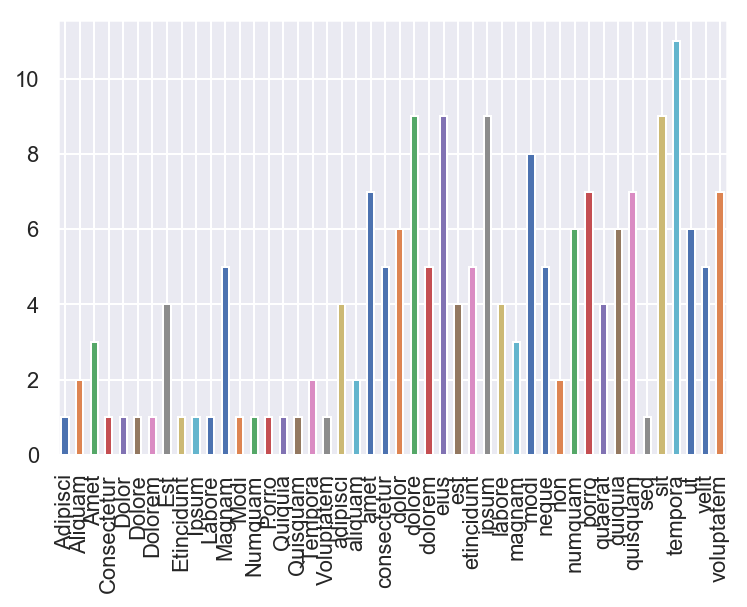

In [44]:
text_serie.plot.bar()

### Exercise 4
- Pandas provides explicit functions for indexing `loc` and `iloc`.
    - Use `loc` to display the number of occurrences of 'dolore'.
    - Use `iloc` to diplay the number of occurrences of the last word in index.

In [49]:
text_serie.loc['dolore']

9

In [51]:
text_serie.iloc[text_serie.size-1]

7

### Exercise 5
- Sort words by number of occurrences.
- Plot the Series.

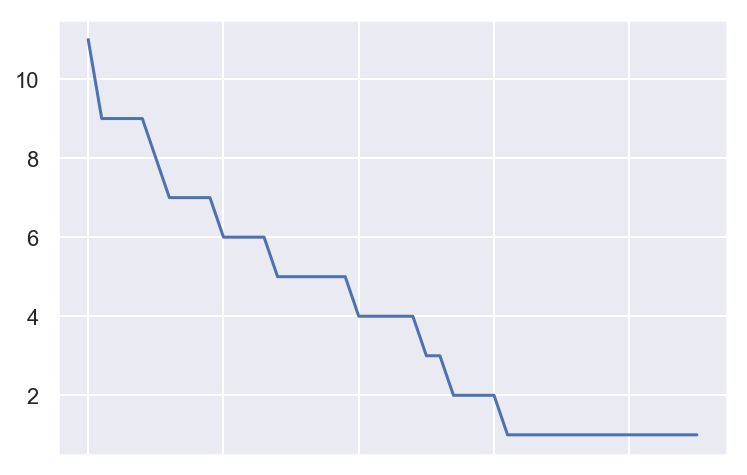

In [65]:
ordered_text_serie = text_serie.sort_values(ascending=False)
ordered_text_serie.plot()

## Full globe temperature between 1901 and 2000.

We read the text file and load the results in a pandas dataframe. 
In cells below you need to clean the data and convert the dataframe to a time series.

In [163]:
import os
here = os.getcwd()

filename = os.path.join(here,"../data","monthly.land.90S.90N.df_1901-2000mean.dat.txt")

df = pd.read_table(filename, sep="\s+", 
                   names=["year", "month", "mean temp"])
df

,year,month,mean temp
0,1880,1,-0.0235
1,1880,2,-0.4936
2,1880,3,-0.6785
3,1880,4,-0.2829
...,...,...,...
1580,2011,9,-999.0000
1581,2011,10,-999.0000
1582,2011,11,-999.0000
1583,2011,12,-999.0000


### Exercise 6

- Insert a third column with value one named "day" with `.insert`.
- convert df index to datetime with `pd.to_datetime` function.
- convert df to Series containing only "mean temp" column.
- Display the beginning of the serie with `.head`.
- Display the end of the serie with `.tail`.
- In the dataset, -999.00 was used to indicate that there was no value for that year. Display values equal to -999 with `.values`. 
- Replace the missing value (-999.000) by `np.nan` 
- Once they have been converted to np.nan, missing values can be removed (dropped).
Remove missing values with `.dropna`.
- Generate a basic visualization using `.plot`.
- Convert df index from timestamp to period is more meaningfull since it was measured and averaged over the month. Use `to_period` method.

In [167]:
#df=df.set_index('year')
#df.insert(1,"day",3)
#df.index = pd.to_datetime(df.index,format="%Y")
#dft=df['mean temp']
#dft.head
#dft.tail
#df[dft.values==-999]=np.NAN
#df=df.dropna()
#dft[dft.values==-999]=np.NAN
#dft=dft.dropna()
#dft.plot()
#dft.to_period(freq="M").plot()

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Exercise

- With `resample` method, convert df Series to 10 year blocks:

In [173]:
df.resample('10A').mean()

,month,day,mean temp
year,,,
1880-12-31,6.5,3.0,-0.381800
1890-12-31,6.5,3.0,-0.389158
1900-12-31,6.5,3.0,-0.287662
1910-12-31,6.5,3.0,-0.270017
...,...,...,...
1990-12-31,6.5,3.0,0.227565
2000-12-31,6.5,3.0,0.460519
2010-12-31,6.5,3.0,0.829147
2020-12-31,6.5,3.0,-499.127283
